<a href="https://colab.research.google.com/github/bruno353/Data_Science_Projects/blob/main/Projeto_Portf%C3%B3lio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Portfólio

o dataset: https://www.kaggle.com/blastchar/telco-customer-churn

Nesse projeto, fomos contratados por uma empresa  de telefonia que tem o objetivo de diminuir a taxa de clientes que cancelam as suas contas por ano, a taxa de evasão aumentou nos últimos tempos.

O nosso objetivo, como o Cientista de Dados contratado pela empresa, é criar uma ferramenta capaz de diminuir o número de clientes em churn na telefônica, em que um incentivo financeiro seria oferecido àqueles clientes com maior probabilidade de sair.

Respondendo tais perguntas:

1-Qual a acurácia do modelo criado ?

2-Qual a relação entre os clientes que entram em churn e às variáveis disponíveis no dataset ? O que esses clientes têm em comum ?

##Extração de dados e análise:

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [59]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df.shape

(7043, 21)

In [61]:
df.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
9995-HOTOH  Male    0              Yes      Yes         63      No            No phone service  DSL              Yes                  Yes                  Yes                  No                   Yes                  Yes                  Two year        No                Electronic check           59.00           3707.6        No       1
3370-HXOPH  Female  0              No       No          3       Yes           Yes               Fiber optic      No                   No                   No                   No                   No                   No                   Month-to-month  No                Electronic check           76.10           257.6  

In [62]:
for col in df:
	print(f'{col}: {df[col].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

##Data Cleaning

###Trocando variáveis binárias

In [63]:
df.drop(['customerID'], axis = 1, inplace = True)

In [64]:
df.gender = df["gender"].apply(lambda x: 1 if x == 'Female' else 0)


In [65]:
df.Partner = df["Partner"].apply(lambda x: 1 if x == 'Yes' else 0)


In [66]:
df.Dependents = df["Dependents"].apply(lambda x: 1 if x == 'Yes' else 0)


In [67]:
df.PhoneService = df["PhoneService"].apply(lambda x: 1 if x == 'Yes' else 0)


In [68]:
df.PaperlessBilling = df['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)

In [69]:
df.Churn = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [75]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [74]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors= 'coerce')


###Trocando variáveis categóricas

In [76]:
df = pd.get_dummies(df, drop_first = True)


In [77]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [78]:
df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No inter

In [82]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PaymentMethod_Mailed check,0,0.0
OnlineSecurity_No internet service,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
PaperlessBilling,0,0.0
MonthlyCharges,0,0.0
TotalCharges,0,0.0


In [81]:
df.dropna(inplace=True)

##Data Visualization

In [85]:
df_graphs = df[['Churn', 'PhoneService', 'gender', 'SeniorCitizen', 'Dependents', 'Partner', 'PaperlessBilling' ]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02222dbcd0>,
      dtype=object)

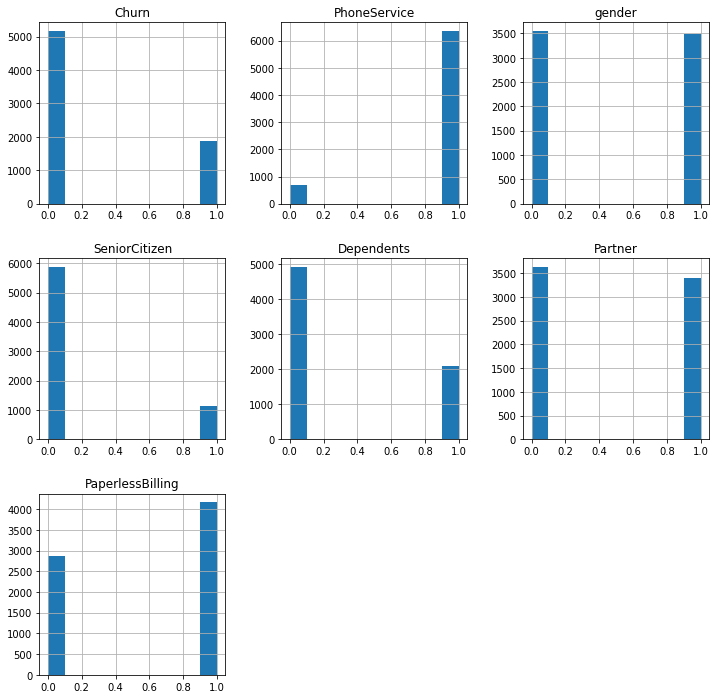

In [87]:
df_graphs.hist(figsize = (12,12))


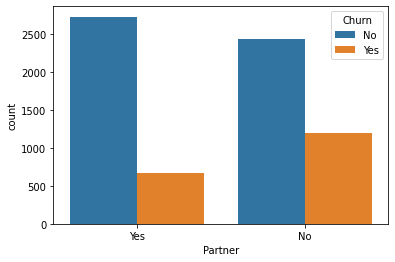

In [8]:
import seaborn as sns
sns.countplot(x = 'Partner', hue = 'Churn', data = df);

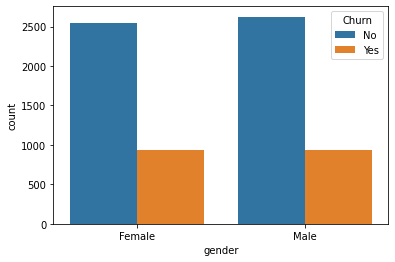

In [9]:
import seaborn as sns
sns.countplot(x = 'gender', hue = 'Churn', data = df);

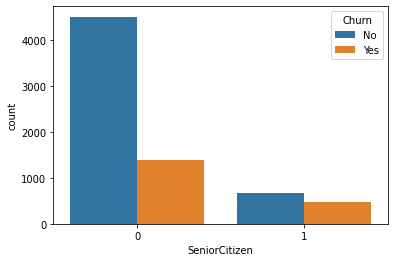

In [10]:
import seaborn as sns
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = df);

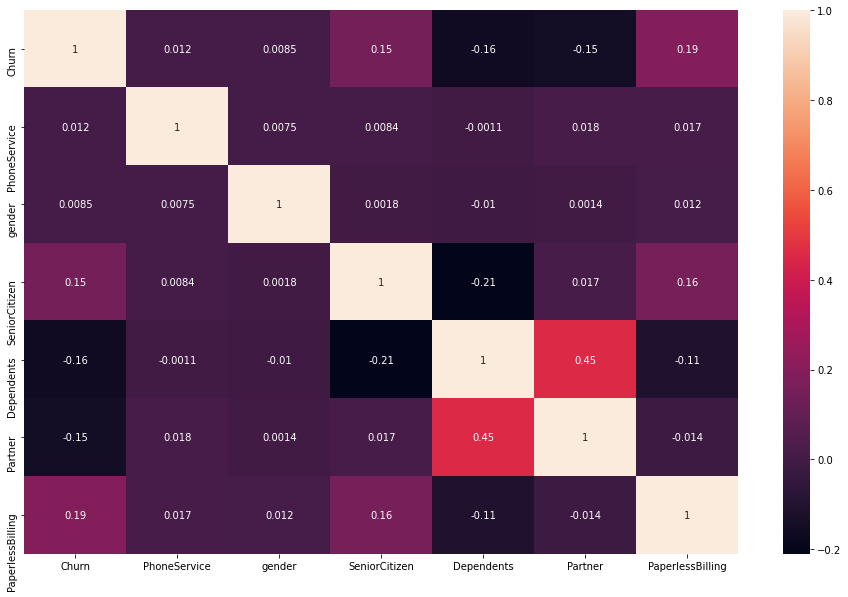

In [88]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(df_graphs.corr(method='pearson'), annot=True)

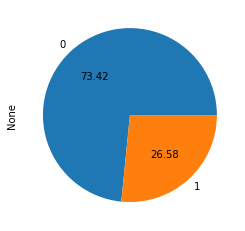

In [89]:
df.groupby('Churn').size().plot(kind='pie', autopct='%.2f')


In [115]:
c = df.corr().abs()
list = str('Churn')
s = c.unstack()
so = s.sort_values(kind="quicksort")
for i, v in so.items():
  if v != 1:
     print(i, v)

('TotalCharges', 'gender') 4.783950839776907e-05
('gender', 'TotalCharges') 4.783950839776907e-05
('PaymentMethod_Mailed check', 'Contract_One year') 0.0001971241890499786
('Contract_One year', 'PaymentMethod_Mailed check') 0.0001971241890499786
('StreamingMovies_No internet service', 'Partner') 0.0002855204740384597
('StreamingTV_No internet service', 'Partner') 0.0002855204740384597
('OnlineBackup_No internet service', 'Partner') 0.0002855204740384597
('OnlineSecurity_No internet service', 'Partner') 0.0002855204740384597
('Partner', 'InternetService_No') 0.0002855204740384597
('Partner', 'OnlineSecurity_No internet service') 0.0002855204740384597
('TechSupport_No internet service', 'Partner') 0.0002855204740384597
('Partner', 'OnlineBackup_No internet service') 0.0002855204740384597
('Partner', 'DeviceProtection_No internet service') 0.0002855204740384597
('Partner', 'TechSupport_No internet service') 0.0002855204740384597
('Partner', 'StreamingTV_No internet service') 0.00028552047

In [ ]:
#Maiores relações com churn: Tenure(0.35), Serviço de fibra óptica(0.30), Contrato de 2 anos(0.30), Método de pagamento de cartão de crédito(0.30)

##Pré-processamento e modelagem

In [116]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [119]:
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics  import accuracy_score,classification_report,roc_auc_score,plot_roc_curve,plot_precision_recall_curve
logreg=Pipeline([('logistic',LogisticRegression())])
decision=Pipeline([('dt',DecisionTreeClassifier())])
randomforest=Pipeline([('rf',RandomForestClassifier())])
naivebayes=Pipeline([('nb',GaussianNB())])
knn=Pipeline([('knn',KNeighborsClassifier())])
gbc=Pipeline([('gbc',GradientBoostingClassifier())])
adaboost=Pipeline([('adaboost',AdaBoostClassifier())])
sgdclassifier=Pipeline([('SGDclassifier',SGDClassifier())])
svc=Pipeline([('svc',SVC())])
mlpclass=Pipeline([('mlpc',MLPClassifier())])
mypipeline1=[logreg,decision,randomforest,naivebayes,knn,gbc,adaboost,sgdclassifier,svc,mlpclass]
pipelinedict1={0:'logistic',1:'dt',2:'rf',3:'nb',4:'knn',5:'gbc',6:'adaboost',7:'SGDclassifier',
              8:'svc',9:'mlpc'}
for i in mypipeline1:
    i.fit(X_train,y_train)
model_score=[]
model_name=[]
for i,j in enumerate(mypipeline1):
    print("{} test accuracy: {}".format(pipelinedict1[i],j.score(X_test,y_test)))
    model_name.append(pipelinedict1[i])
    model_score.append(j.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


logistic test accuracy: 0.7912400455062572
dt test accuracy: 0.7320819112627986
rf test accuracy: 0.782707622298066
nb test accuracy: 0.6820250284414107
knn test accuracy: 0.7497155858930603
gbc test accuracy: 0.7997724687144482
adaboost test accuracy: 0.7946530147895335
SGDclassifier test accuracy: 0.7792946530147895
svc test accuracy: 0.7901023890784983
mlpc test accuracy: 0.7815699658703071


In [ ]:
#O melhor modelo foi o gbc, com uma acurácia de 79%

##Conclusão
Percebeu-se que o melhor modelo machine learning para esse desafio foi o GradientBoost Classifier, com aproximadamente 80% de acurácia, tornando-se uma boa ferramente para combater a evasão de clientes. Assim, poderia-se usar o algoritmo para calcular os clientes com as maiores probabilidades de saírem da telefonia, oferecendo a eles incentivos financeiros ou novos planos.

As features com maiores correlações com o churn: Tenure(0.35), Serviço de fibra óptica(0.30), Contrato de 2 anos(0.30), Método de pagamento de cartão de crédito(0.30).
Tais features podem e devem ser analisadas junto ao algoritmo para selecionar os clientes com maior prob de evasão.